In [75]:
%matplotlib inline
using LinearAlgebra
using Plots;
gr()

The analogue of IPython's `%matplotlib` in Julia is to use the [PyPlot package](https://github.com/stevengj/PyPlot.jl), which gives a Julia interface to Matplotlib including inline plots in IJulia notebooks.   (The equivalent of `numpy` is already loaded by default in Julia.)

Given PyPlot, the analogue of `%matplotlib inline` is `using PyPlot`, since PyPlot defaults to inline plots in IJulia.

To enable separate GUI windows in PyPlot, analogous to `%matplotlib`, do `using PyPlot; pygui(true)`.   To specify a particular gui backend, analogous to `%matplotlib gui`, you can either do `using PyPlot; pygui(:gui); using PyPlot; pygui(true)` (where `gui` is `wx`, `qt`, `tk`, or `gtk`), or you can do `ENV["MPLBACKEND"]=backend; using PyPlot; pygui(true)` (where `backend` is the name of a Matplotlib backend, like `tkagg`).

For more options, see the PyPlot documentation.


## 図3.1のプログラム

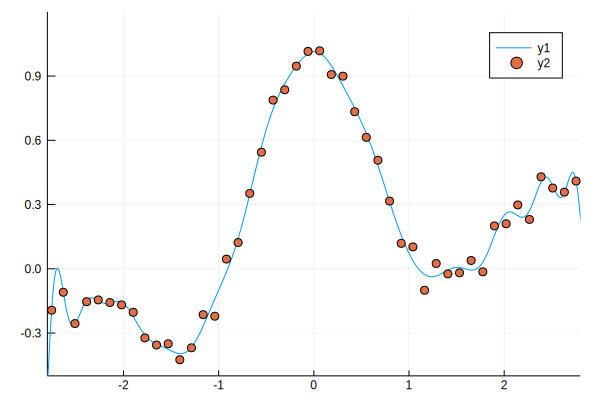

In [2]:
n = 50
N = 1000

x = range(-3, stop=3, length=n)
X = range(-3, stop=3, length=N)
pix = pi * x
y = sin.(pix) ./ pix + 0.1 * x + 0.05 * randn(n, 1)

p = ones(n, 31)
P = ones(N, 31)

for j in 1:15
    p[:, 2*j] = sin.(j/2*x)
    p[:, 2*j+1] = cos.(j/2*x)
    
    P[:, 2*j] = sin.(j/2*X)
    P[:, 2*j+1] = cos.(j/2*X)
end

t = p\y
F = P * t

plot(X, F, xlim=(-2.8, 2.8), ylim=(-0.5, 1.2))
plot!(x, y, st=:scatter)

## 図3.8のプログラム

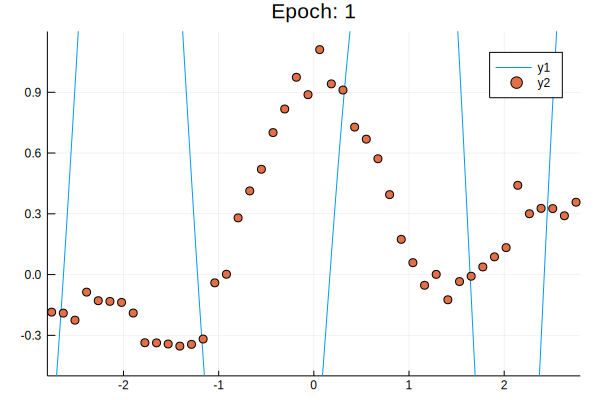

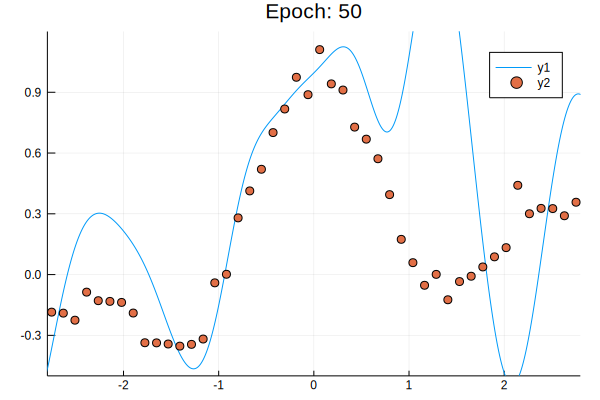

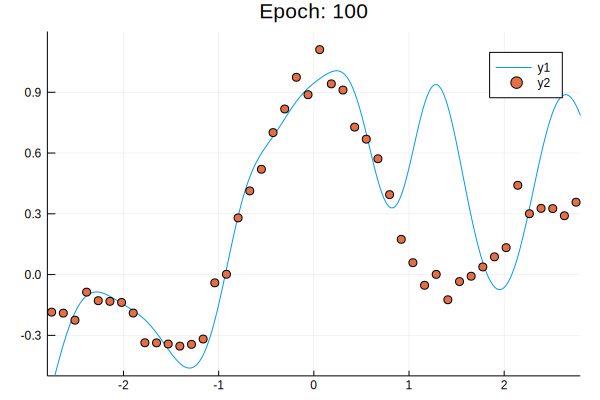

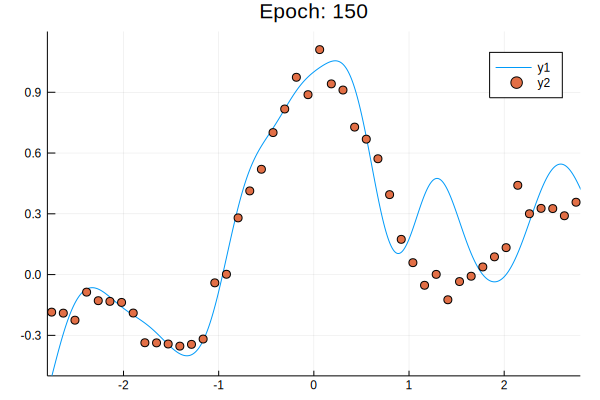

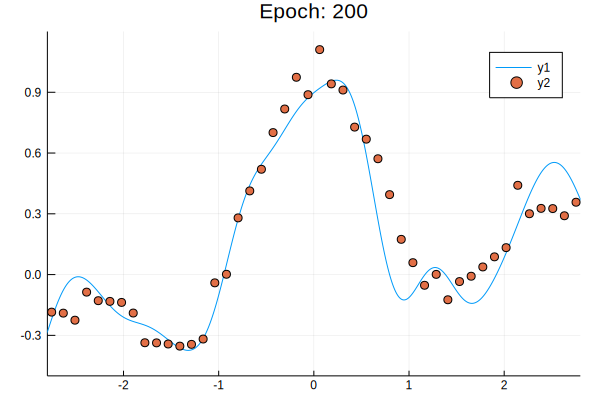

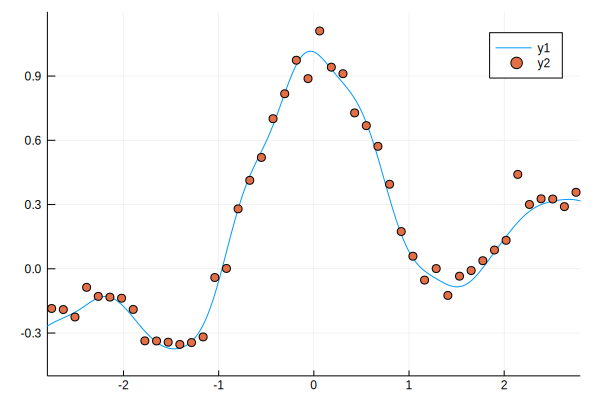

In [84]:
n = 50
N = 1000
x = range(-3, stop=3, length=n)
X = range(-3, stop=3, length=N)
pix = pi * x
y = sin.(pix) ./ (pix) + 0.1 * x + 0.05 * randn(n, 1)

hh = 2 * 0.3 ^ 2
t0 = randn(n, 1)
e = 0.1
K = exp.(-(repeat(X .^ 2, 1, n) .+ repeat((x .^ 2)', N, 1) - 2 * X * x') / hh)

for o in 1:n*1000
    if o in [1, 50, 100, 150, 200]
        F = K * t0
        plot(X, F, xlim=(-2.8, 2.8), ylim=(-0.5, 1.2))
        title!("Epoch: $o")
        display(plot!(x, y, st=:scatter))
    end        
    i = Int64(ceil(rand()*n))
    ki = exp.(- (x .- x[i]) .^ 2 ./ hh)
    t = t0 - e * ki * (ki' * t0 .- y[i])
    if norm(t-t0) < 0.000001
        break
    end
    t0 = t
end

K = exp.(-(repeat(X .^ 2, 1, n) .+ repeat((x .^ 2)', N, 1) - 2 * X * x') / hh)
F = K * t

plot(X, F, xlim=(-2.8, 2.8), ylim=(-0.5, 1.2))
plot!(x, y, st=:scatter)